In [2]:
from bertopic import BERTopic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# load data setof all countries, years and sources
data_file = '../data/all_countries_0.0.1.csv'
all_countries_data = pd.read_csv(data_file, dtype={'year': str}, comment='#')

In [39]:
# check first entry
print(all_countries_data.iloc[0])

sentence    The president is directly elected for up to tw...
section     ['Political Rights', 'Electoral Process', 'Was...
country                                                turkey
year                                                     2021
source                                           freedomhouse
Name: 0, dtype: object


In [92]:
# choose a country and year
country = "hungary"
year = "2020"
df = pd.DataFrame(all_countries_data)
country_data = df[(df['year'] == year) & (df['country'] == country)]
# cast sentence column to string
country_data['sentence'] = country_data['sentence'].astype(str)
# reset index; needed for proper parsing by BERT
country_data = country_data.reset_index(drop=True)

In [93]:
# show first 10 sentences
print(country_data.iloc[:10]['sentence'])

0    The National Assembly elects both the presiden...
1    The president’s duties are mainly ceremonial, ...
2    The president is limited to a maximum of two t...
3    János Áder, a founding member of Fidesz, has b...
4    Orbán has been prime minister since 2010, winn...
5    Voters elect representatives every four years ...
6    The coalition of Fidesz and its junior partner...
7    The far-right Movement for a Better Hungary (J...
8    An election-monitoring mission performed by th...
9    While there was no evidence of electoral fraud...
Name: sentence, dtype: object


In [97]:
# load BERT model paraphrase-MiniLM-L3-v2
# setting min_topic_size to 7 and n_grams from 1 to 3
# we need to explore these parameters
model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7, n_gram_range=(1, 3))

In [98]:
# fit model to our data
topics, _ = model.fit_transform(country_data.sentence)


Batches:   0%|          | 0/68 [00:00<?, ?it/s]

2023-05-15 13:38:02,686 - BERTopic - Transformed documents to Embeddings
2023-05-15 13:38:05,910 - BERTopic - Reduced dimensionality
2023-05-15 13:38:05,944 - BERTopic - Clustered reduced embeddings


In [99]:
# get topic information
freq = model.get_topic_info()
# print topic information
print(f"Number of topics: {len(freq)}")
print(freq.head())

Number of topics: 86
   Topic  Count                                               Name
0     -1    410                                    -1_the_of_to_in
1      0    153                      0_fidesz_the_party_opposition
2      1     64                1_the government_government_and_not
3      2     62       2_polarization_socialist_political_hungarian
4      3     61  3_score_provided below its_score ii score_resp...


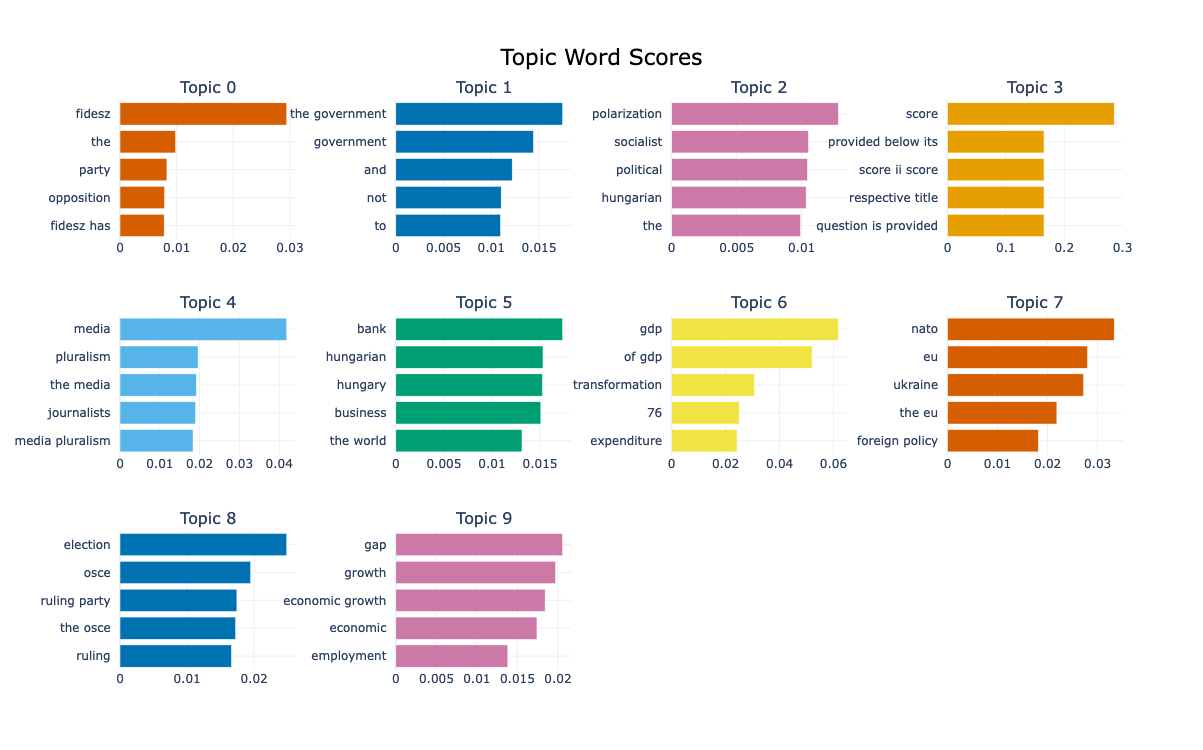

In [100]:
# visualize topic words/n_grams
model.visualize_barchart(top_n_topics=10)

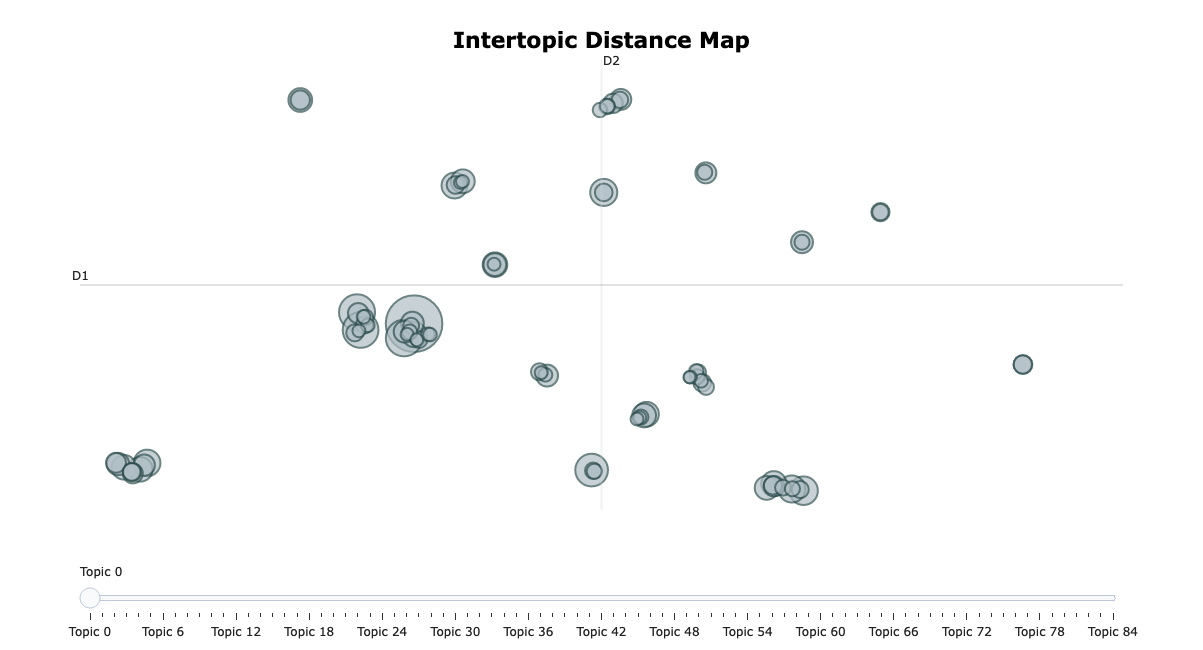

In [103]:
model.visualize_topics()

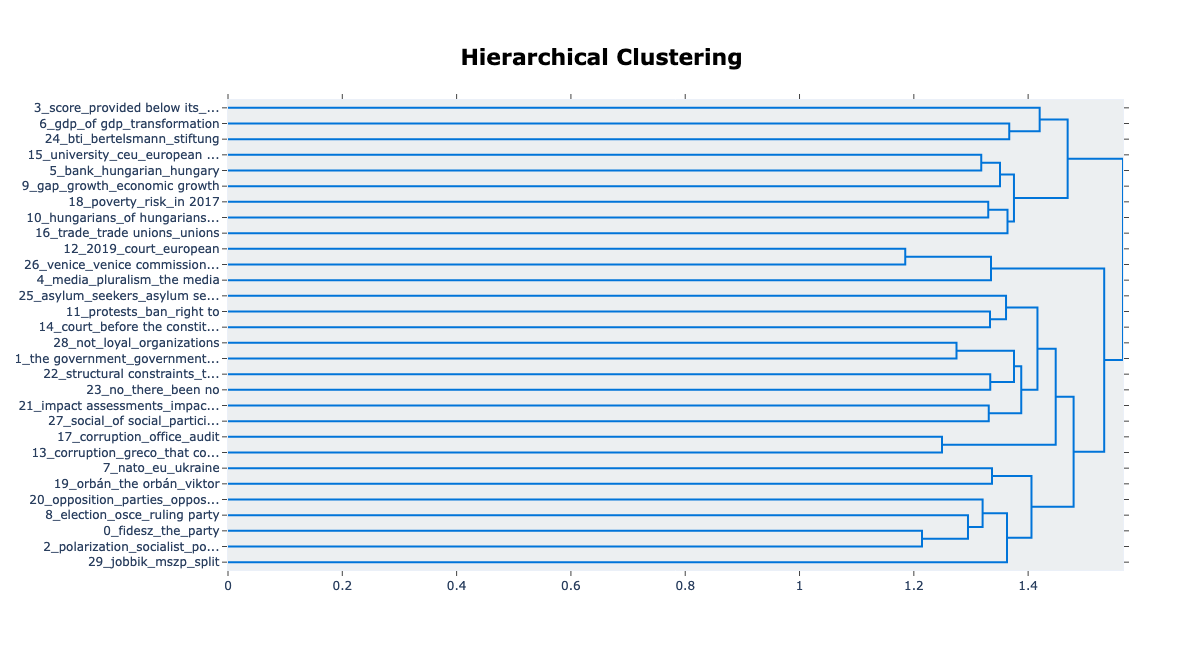

In [101]:
# visualize topic clusters
model.visualize_hierarchy(top_n_topics=30)